# plot anno

In [1]:
.libPaths(c("/hsfscqjf2/ST_CQ/Reference/software/envs/cellchat/lib/R/library",
           "/hsfscqjf2/ST_CQ/Reference/software/envs/RTest/lib/R/library"))

In [2]:

library(Seurat)
library(pheatmap)
library(dplyr)
library(SingleCellExperiment)
library(scuttle)
library(ggplot2)
library(ggsci)
library(ggplot2)
library("scales")


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, co

In [3]:
resultdir<-"/hsfscqjf1/ST_CQ/P24Z32300N0020/hemingmin/bom/10.sn_merged2/results/2_anno/"
figuredir=resultdir
setwd(resultdir)

In [4]:
sc_case<-readRDS(file="./singlR/anno.rds")

In [5]:
table(sc_case$celltype)


         Apoptosis Cell_morphogenesis          Cuticle_1          Cuticle_2 
             13646              26040               5801               2884 
      Epithelial_1             Immune 
             23933              53413 

In [6]:
pal=c("Cell_morphogenesis"='#1f77b4',
  "Epithelial_1"='#279e68',
        "Epithelial_2"='#98df8a',
       "Epithelial_3"='#b5bd61',
"Cuticle_1"='#d62728',
 "Cuticle_2"='#e377c2',
 "Cuticle_3"='#ff9896',
 "Immune"='#f7b6d2',
 "Apoptosis"='#aa40fc',
"Metabolic_process"='#c49c94',
 "Axon_development"='#ffbb78',
 "Ciliated_cell"='#ff7f0e'
     )

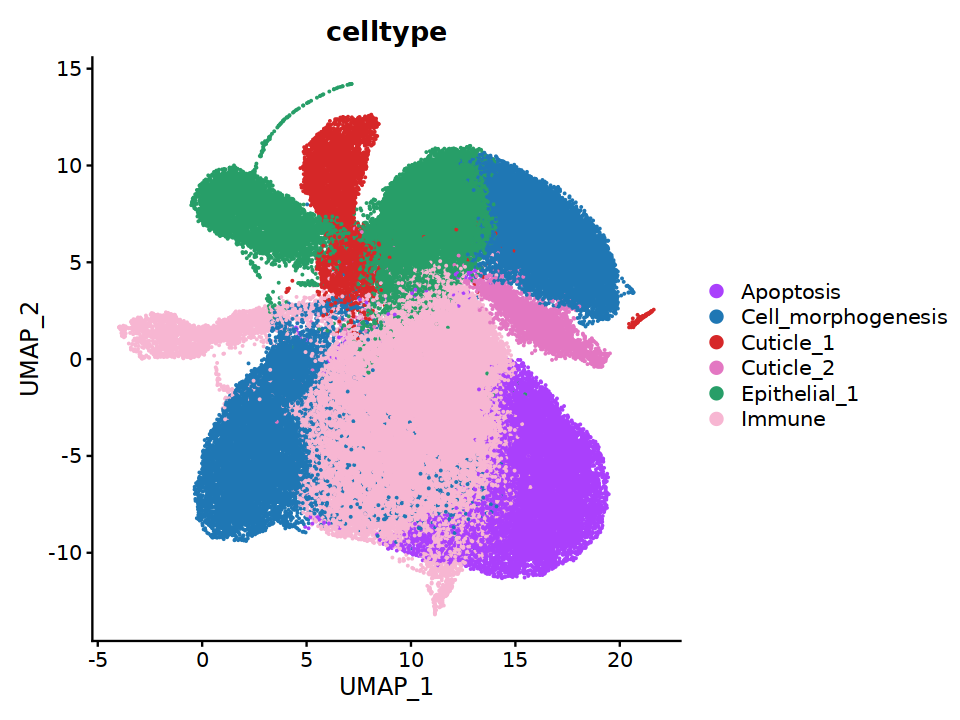

In [8]:
width=8
height=6
options(repr.plot.width = width, repr.plot.height=height)
p2 <-print(DimPlot(sc_case, group.by="celltype", label=F, label.size=5,pt.size=0.05,raster=FALSE,cols = pal, reduction='umap'))
# ggsave(p2, filename="anno_umap.pdf",width = width,height = height)


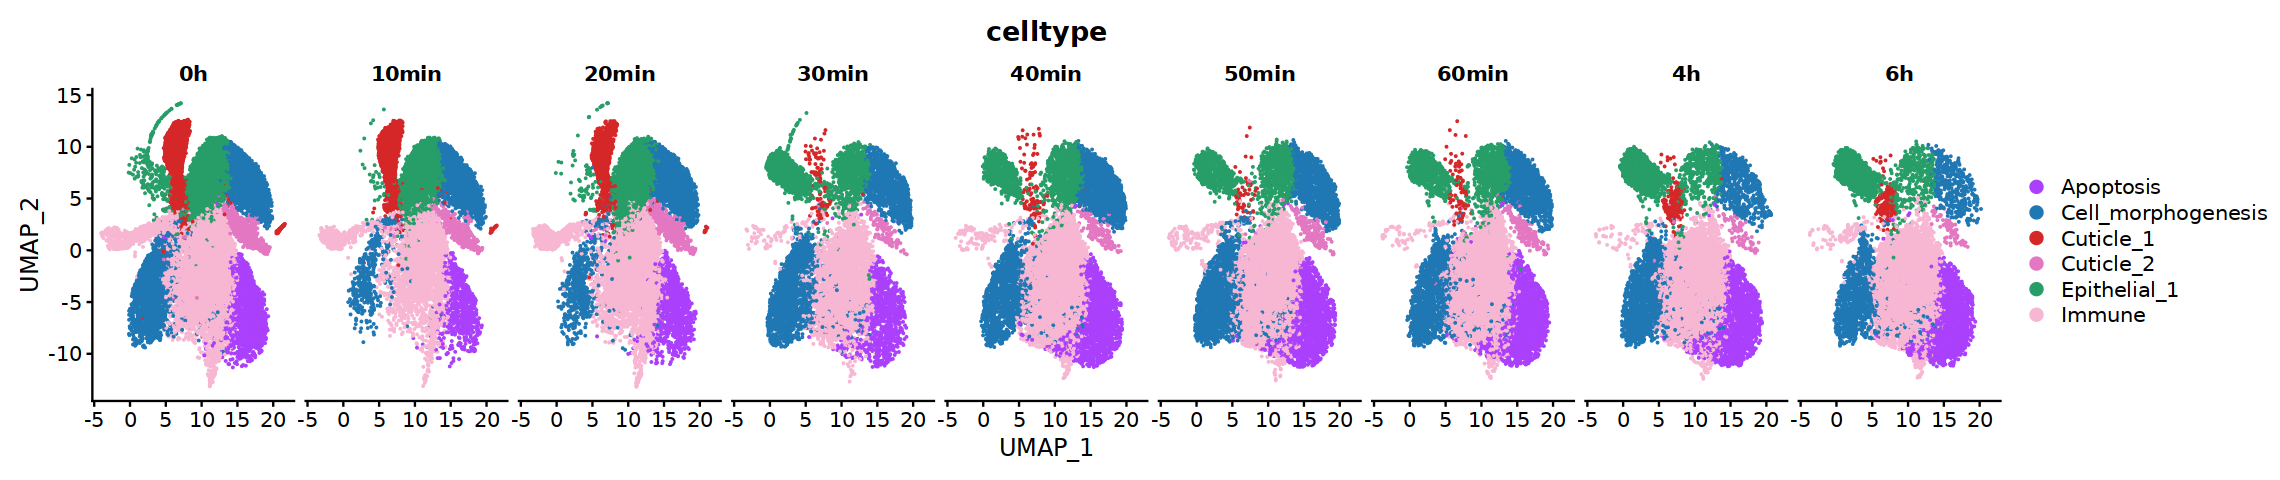

In [9]:
width=19
height=4
options(repr.plot.width = width, repr.plot.height=height)

p2 <-print(DimPlot(sc_case, group.by="celltype", split.by = "timepoint",label=F,
                   pt.size=0.05,
                   raster=FALSE, label.size=5,cols = pal, reduction='umap'))
# ggsave(p2, filename="anno_umap_split.pdf",width = width,height = height)


In [8]:
Idents(sc_case)<-sc_case$celltype
metadata<-sc_case@meta.data
write.csv(metadata,file="metadata.csv")

In [9]:
options(repr.plot.width = 10, repr.plot.height=10)
data<-as.data.frame(table(sc_case@meta.data$timepoint,sc_case@meta.data$celltype))
colnames(data)<-c("timepoint","celltype","count")

plot.data<-data %>%
  group_by(timepoint,celltype) %>% 
summarise(n = sum(count)) %>%mutate(percentage = n/sum(n)) 
# str(plot.data)
write.csv(plot.data,file="plot_data_line.csv")


`summarise()` has grouped output by 'timepoint'. You can override using the
`.groups` argument.


In [7]:
plot.data<-read.csv(file="plot_data_line.csv")


In [11]:
plot.data$timepoint <- factor(plot.data$timepoint,levels=c("0h","10min","20min","30min","40min","50min","60min","4h","6h"))

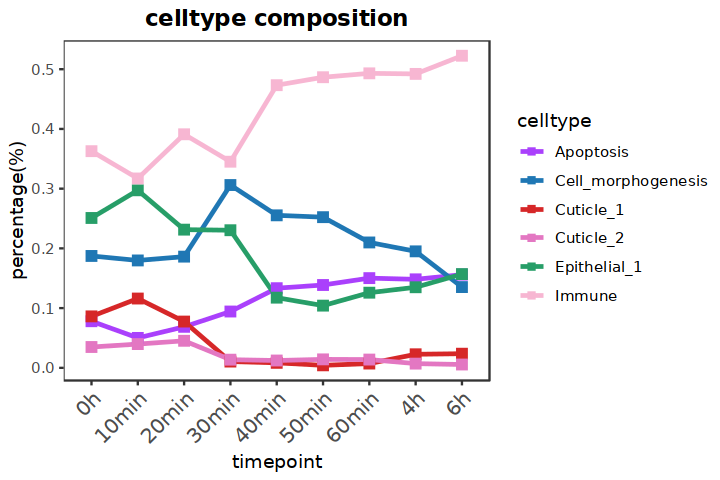

In [17]:
width=6
height=4
options(repr.plot.width = width, repr.plot.height=height)
p4<-print(      
       ggplot(plot.data,aes(x=timepoint, y=percentage,group=celltype,fill=celltype)) +
      geom_line( aes(color=celltype),size = 1) +
     geom_point(aes(color=celltype),shape=15,size = 3)+
    # geom_point(data2,mapping =aes(x=timepoint_2, y=percentage,group=celltype_level1,fill=celltype_level1),colour="#000099",show_guide = T)+
    # facet_wrap(vars(celltype_level1), scales = "free")+
        scale_color_manual(values=pal)+
    guides(colour = guide_legend(override.aes = list(size=2)))+
       theme_bw()+
         theme(panel.grid.major=element_line(colour=NA),
            panel.background = element_rect(fill = "transparent",colour = NA),
            plot.background = element_rect(fill = "transparent",colour = NA),
            panel.grid.minor = element_blank())+
      theme(axis.text.x = element_text(angle = 45,vjust = 1, hjust=1,size = 12)) +
      theme(plot.title = element_text(hjust=0.5, face="bold")) +
          labs(x="timepoint",y = "percentage(%)",title = "celltype composition"))

ggsave(p4, filename="celltype_percentage_timepoint_plot_line.pdf",width = width,height = height)

